In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re

In [2]:
sharks_df = pd.read_csv("./data/attacks.csv", encoding='windows-1252')

In [3]:
pd.set_option('display.expand_frame_repr', False)
sharks_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
sharks_df.shape

(25723, 24)

In [5]:
# Dropping non-informative columns

sharks_df.drop(columns=["pdf", "href formula", "href", "Case Number.1", "Case Number.2", "original order", "Investigator or Source", "Unnamed: 22","Unnamed: 23"], inplace=True)

In [6]:
# Dropping the duplicates

sharks_df.drop_duplicates(keep='first', inplace=True)

In [7]:
# Only 6312 shark attack records remain

sharks_df.shape

(6305, 15)

In [8]:
# Un poquito para ver que columnas hay
columnas = [column for column in sharks_df.columns]
columnas

['Case Number',
 'Date',
 'Year',
 'Type',
 'Country',
 'Area',
 'Location',
 'Activity',
 'Name',
 'Sex ',
 'Age',
 'Injury',
 'Fatal (Y/N)',
 'Time',
 'Species ']

In [9]:
sharks_df["Case Number"].str.extract("(\d{4})\.(\d{2})").at[4427, 0]


'1951'

In [10]:
sharks_df["Case Number"].str.extract("(\d{4})\.(\d{2})").at[4427, 1]

'11'

In [11]:
# Get Month and Year from "Case Number"

sharks_df["Year_extracted"] = sharks_df["Case Number"].str.extract("(\d{4})\.(\d{2})")[0]
sharks_df["Month_extracted"] = sharks_df["Case Number"].str.extract("(\d{4})\.(\d{2})")[1]


sharks_df["Month_extracted"] = sharks_df["Month_extracted"].apply(lambda month: np.nan if month == "00" else month)
sharks_df["Month_extracted"] = sharks_df["Month_extracted"].apply(lambda month: np.nan if pd.isnull(month) else np.int64(month))

sharks_df["Year_extracted"] = sharks_df["Year_extracted"].apply(lambda year: np.nan if year == "0000" else year)
sharks_df["Year_extracted"] = sharks_df["Year_extracted"].apply(lambda year: np.nan if pd.isnull(year) else np.int64(year))

In [12]:
# Cleaning "Country"

sharks_df["Country"].value_counts(dropna=False)

USA                      2229
AUSTRALIA                1338
SOUTH AFRICA              579
PAPUA NEW GUINEA          134
NEW ZEALAND               128
                         ... 
THE BALKANS                 1
NORTH ATLANTIC OCEAN        1
MAYOTTE                     1
GABON                       1
CEYLON (SRI LANKA)          1
Name: Country, Length: 213, dtype: int64

In [13]:
# Cleaning column "Fatal (Y/N)"
values_OK_fatal = ["N", "Y", np.nan, "UNKNOWN"]
sharks_df["Fatal (Y/N)"] = sharks_df["Fatal (Y/N)"].apply(lambda string: string if pd.isnull(string) else string.strip().upper())
sharks_df["Fatal (Y/N)"] = sharks_df["Fatal (Y/N)"].apply(lambda value: value if value in values_OK_fatal else np.nan)

In [14]:
# Cleaning column "Sex "
sharks_df["Sex "] = sharks_df["Sex "].apply(lambda string: string if pd.isnull(string) else string.strip().upper())

# values_OK_sex = ["M", "F", np.nan]
# sharks_df[sharks_df["Sex "].apply(lambda value: True if value not in values_OK_sex else False)]

sharks_df.at[1624, "Sex "] = "M"
sharks_df.at[4938, "Sex "] = np.nan
sharks_df.at[5437, "Sex "] = np.nan
sharks_df.at[6131, "Sex "] = "M"

In [15]:
# Cleaning column "Age"
sharks_df["Age"] = sharks_df["Age"].str.extract("(\d{1,2})")
sharks_df["Age"] = sharks_df["Age"].apply(lambda age: np.nan if pd.isnull(age) else np.int64(age))

In [16]:
# Cleaning column "Species "
sharks_df["Species "] = sharks_df["Species "].apply(lambda string: string if pd.isnull(string) else string.strip().lower())

In [17]:
#sharks_df["Species "].value_counts(dropna=False).to_csv("./Species.csv", index=True)

In [18]:
# Read csv with list of shark species
species_list = pd.read_csv("./data/shark_species_clean.csv")

In [19]:
# New DataFrame containing only the rows where species is informed
sharks_df_with_species = sharks_df[sharks_df['Species '].notna()]

In [20]:
# Removing rows where the species field contains "no shark" or "nor confirmed"
sharks_df_with_species = sharks_df_with_species[~sharks_df_with_species["Species "].str.contains("no shark", regex=False)]
sharks_df_with_species = sharks_df_with_species[~sharks_df_with_species["Species "].str.contains("not confirmed", regex=False)]

In [21]:
sharks_df_with_species["Real_Species"] = np.nan

In [22]:
def species_finder(species_column_value):
    for shark in species_list["Species_list"]:
        if shark in species_column_value:
            return shark
    return np.nan

In [23]:
sharks_df_with_species["Real_Species"] = sharks_df_with_species["Species "].apply(species_finder)

In [24]:
with open('./data/shark_dict.pickle', 'rb') as handle:
    shark_dict = pickle.load(handle)

In [25]:
# Applying the dictionary to complete the name of some incomplete species
sharks_df_with_species["Real_Species"] = sharks_df_with_species["Real_Species"].apply(lambda species: shark_dict[species] if species in shark_dict.keys() else species)

In [26]:
# DataFrame with "Real_Species"  and "Fatal (Y/N)" columns, dropping NaNs and "UNKNOWN" values in the Fatality column
fatality_by_species = sharks_df_with_species[["Real_Species", "Fatal (Y/N)"]].dropna(how="any")
fatality_by_species = fatality_by_species[fatality_by_species["Fatal (Y/N)"] != "UNKNOWN"]
fatality_by_species = fatality_by_species.value_counts().unstack()
fatality_by_species["Y"] = fatality_by_species["Y"].fillna(0)
fatality_by_species["Total"] = fatality_by_species["N"]+fatality_by_species["Y"]
fatality_by_species["Fatality_ratio_%"] = (fatality_by_species["Y"]/(fatality_by_species["Total"])*100).round(decimals=2)
fatality_by_species.reset_index(inplace=True)
fatality_by_species.rename({"N": "Non Fatal", "Y": "Fatal"}, axis='columns',  inplace=True)
fatality_by_species["Real_Species"] = fatality_by_species["Real_Species"].apply(lambda string: string if pd.isnull(string) else string.title())
fatality_by_species.set_index("Real_Species", inplace=True)

In [27]:
# Keeping only species that have more than 20 attacks registered
fatality_by_species = fatality_by_species[fatality_by_species["Total"]>20].sort_values(by="Total", ascending=False)

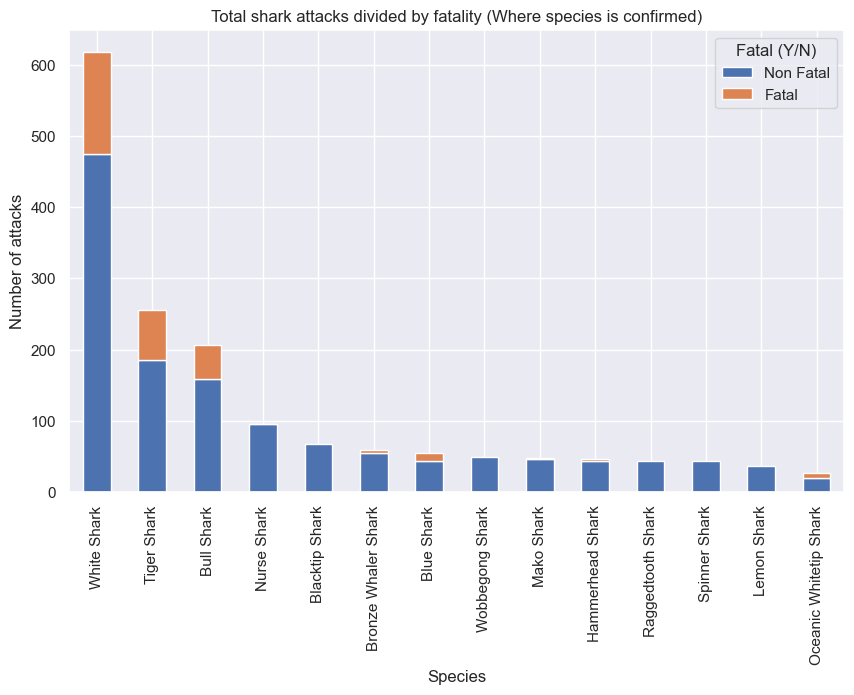

In [49]:
# Total attacks by species
sns.set(rc={'figure.figsize':(10,6)})
fatality_by_species[["Non Fatal", "Fatal"]].plot(kind="bar", stacked=True)
plt.xlabel('Species')
plt.ylabel("Number of attacks")
plt.title("Total shark attacks divided by fatality (Where species is confirmed)")
plt.savefig("./images/total_attacks_fatality.png", bbox_inches='tight')

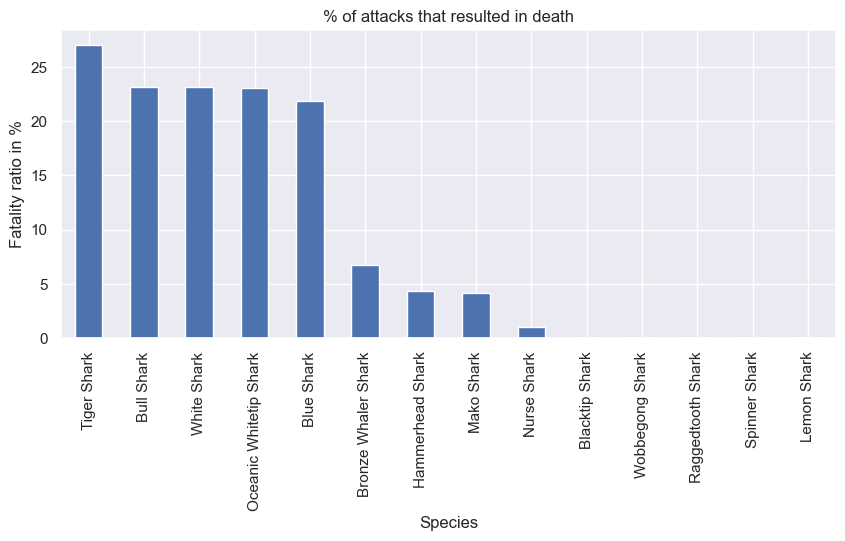

In [70]:
# Most deadly sharks
sns.set(rc={'figure.figsize':(10,4)})
fatality_by_species["Fatality_ratio_%"].sort_values(ascending=False).plot(kind="bar")
plt.ylabel("Fatality ratio in %")
plt.xlabel("Species")
plt.title("% of attacks that resulted in death")
plt.savefig("./images/fatality_ratio.png", bbox_inches='tight')

In [30]:
age_year_df = sharks_df[["Age", "Year_extracted", "Sex ", "Fatal (Y/N)"]].dropna(how="any")
age_year_df = age_year_df[age_year_df["Fatal (Y/N)"] != "UNKNOWN"]
age_year_df = age_year_df[age_year_df["Year_extracted"] > 1900]

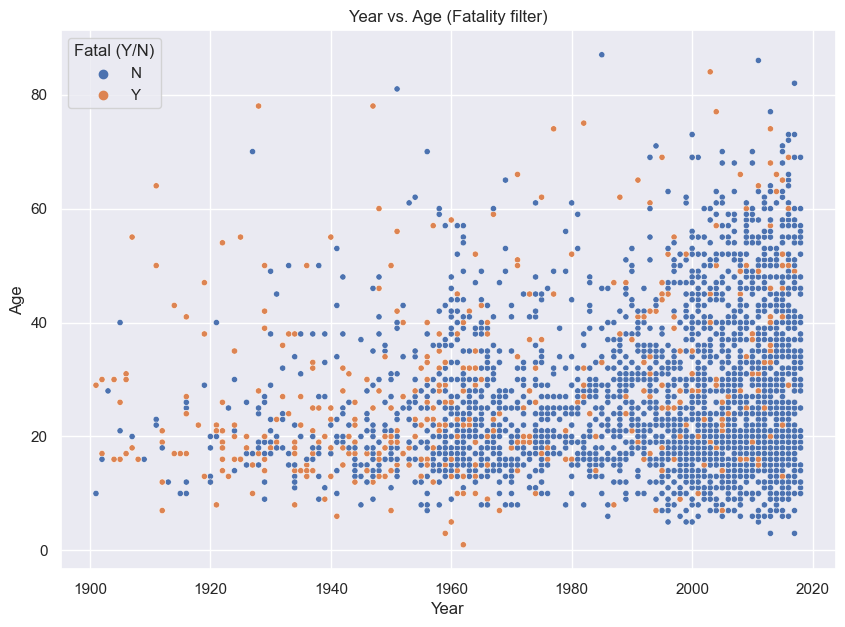

In [51]:
plt.subplots(figsize=(10, 7))
ax = sns.scatterplot(data=age_year_df, x="Year_extracted", y="Age", hue="Fatal (Y/N)", s=20)
ax.set(xlabel='Year', ylabel='Age', title="Year vs. Age (Fatality filter)")
plt.savefig("./images/year_vs_age_fatality.png", bbox_inches='tight')

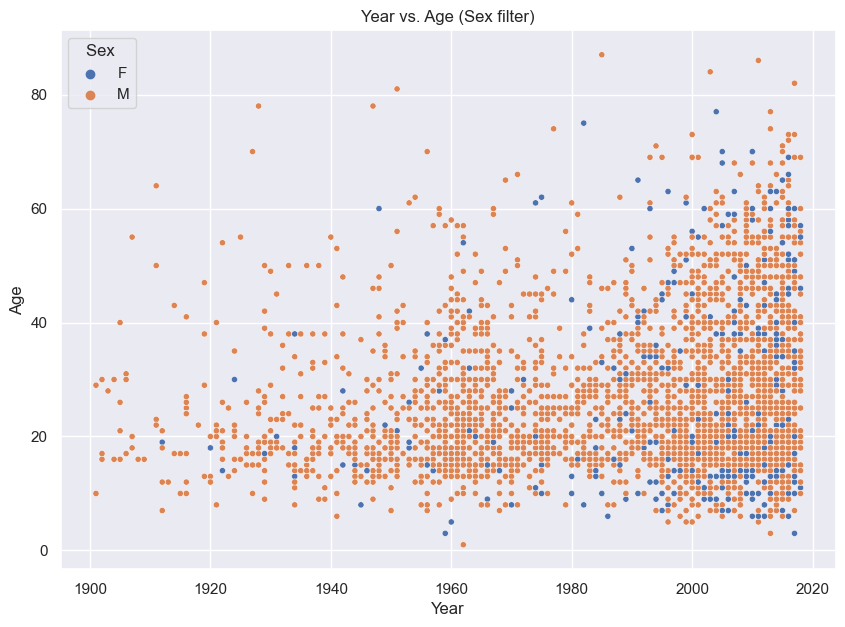

In [52]:
plt.subplots(figsize=(10, 7))
ax = sns.scatterplot(data=age_year_df, x="Year_extracted", y="Age", hue="Sex ", s=20)
ax.set(xlabel='Year', ylabel='Age', title="Year vs. Age (Sex filter)")
plt.savefig("./images/year_vs_age_sex.png", bbox_inches='tight')

In [33]:
# top_dangerous_sharks = ['White Shark',
#  'Tiger Shark',
#  'Bull Shark',
#  'Nurse Shark',
#  'Blacktip Shark',
#  'Bronze Whaler Shark',
#  'Blue Shark',
#  'Wobbegong Shark',
#  'Mako Shark',
#  'Hammerhead Shark',
#  'Raggedtooth Shark',
#  'Spinner Shark',
#  'Lemon Shark',
#  'Oceanic Whitetip Shark']

In [34]:
top_dangerous_sharks = ['White Shark',
 'Tiger Shark',
 'Bull Shark',
 'Nurse Shark',
 'Blacktip Shark']

species_complete_df = sharks_df_with_species[["Age", "Year_extracted", "Sex ", "Real_Species", "Fatal (Y/N)"]].dropna(how="any")
species_complete_df = species_complete_df[species_complete_df["Fatal (Y/N)"] != "UNKNOWN"]
species_complete_df = species_complete_df[species_complete_df["Year_extracted"] > 1920]
species_complete_df["Real_Species"] = species_complete_df["Real_Species"].apply(lambda string: string if pd.isnull(string) else string.title())
species_complete_df = species_complete_df[species_complete_df["Real_Species"].apply(lambda shark: True if shark in top_dangerous_sharks else False)]

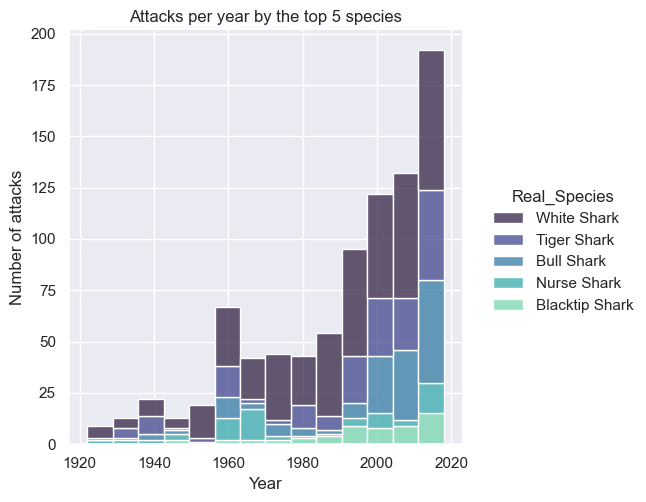

In [62]:
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.displot(species_complete_df, x="Year_extracted", hue="Real_Species", multiple="stack", palette="mako")
ax.set(xlabel='Year', ylabel='Number of attacks', title="Attacks per year by the top 5 species")
plt.savefig("./images/hst_attacks_year_top5.png", bbox_inches='tight')

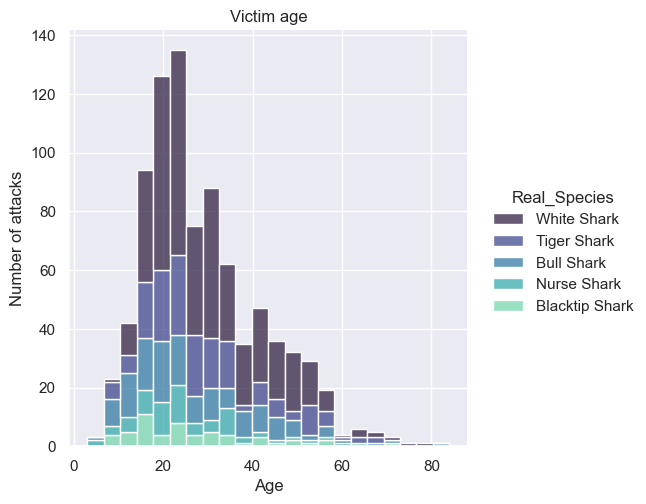

In [61]:
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.displot(species_complete_df, x="Age", hue="Real_Species", multiple="stack", palette="mako")
ax.set(xlabel='Age', ylabel='Number of attacks', title="Victim age")
plt.savefig("./images/hst_attacks_victim_age_top5.png", bbox_inches='tight')

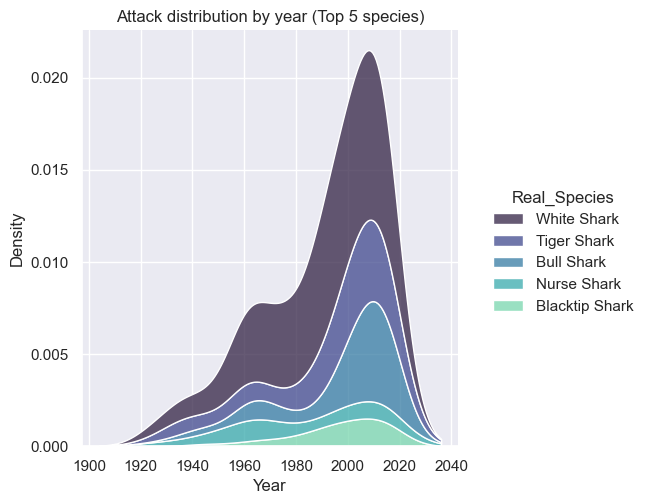

In [63]:
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.displot(species_complete_df, x="Year_extracted", hue="Real_Species", kind="kde", multiple="stack", palette="mako")
ax.set(xlabel='Year', ylabel='Density', title="Attack distribution by year (Top 5 species)")
plt.savefig("./images/kde1_attacks_year_top5.png", bbox_inches='tight')

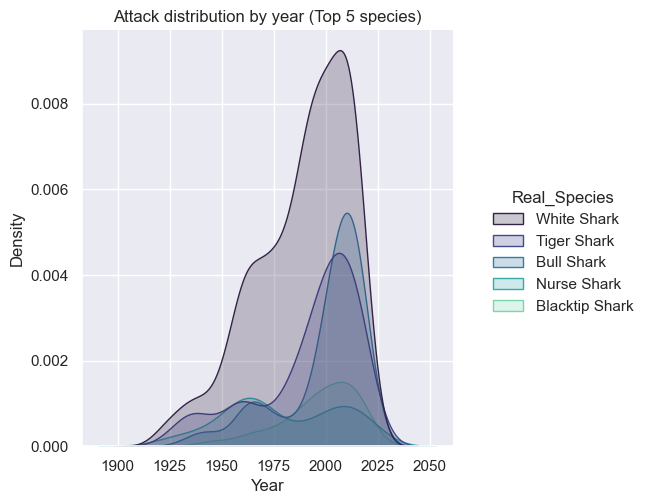

In [65]:
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.displot(species_complete_df, x="Year_extracted", hue="Real_Species", kind="kde", fill=True, palette="mako")
ax.set(xlabel='Year', ylabel='Density', title="Attack distribution by year (Top 5 species)")
plt.savefig("./images/kde2_attacks_year_top5.png", bbox_inches='tight')

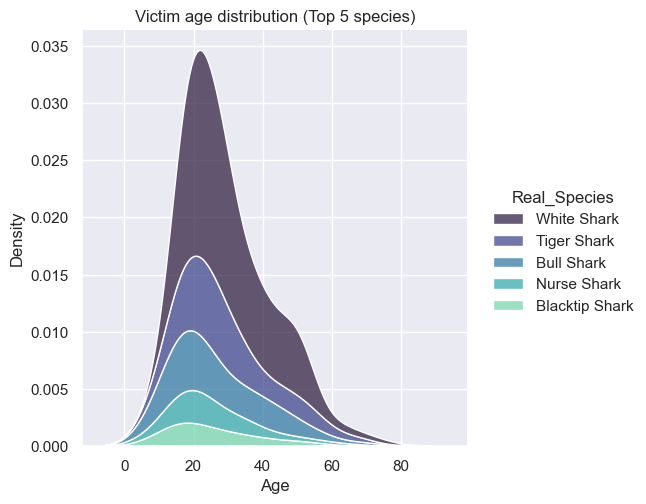

In [66]:
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.displot(species_complete_df, x="Age", hue="Real_Species", kind="kde", multiple="stack", palette="mako")
ax.set(xlabel='Age', ylabel='Density', title="Victim age distribution (Top 5 species)")
plt.savefig("./images/kde1_attacks_victim_age_top5.png", bbox_inches='tight')

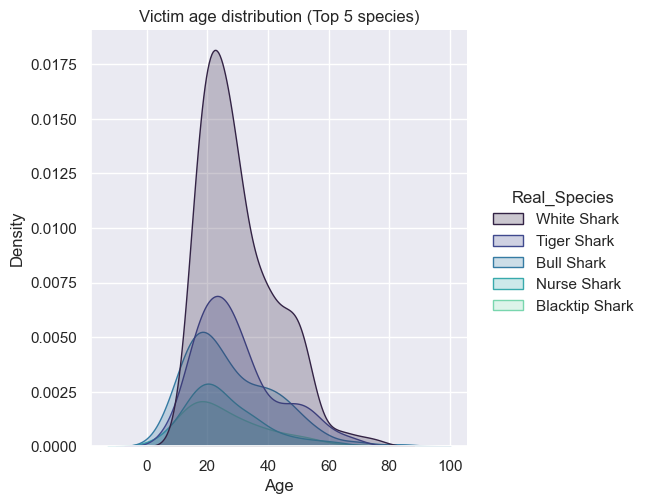

In [67]:
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.displot(species_complete_df, x="Age", hue="Real_Species", kind="kde", fill=True, palette="mako")
ax.set(xlabel='Age', ylabel='Density', title="Victim age distribution (Top 5 species)")
plt.savefig("./images/kde2_attacks_victim_age_top5.png", bbox_inches='tight')

In [42]:
species_fatal_df = species_complete_df[species_complete_df["Fatal (Y/N)"] == "Y"].sort_values(by="Real_Species", ascending=False)

In [43]:
top_dangerous_sharks = ['White Shark',
 'Tiger Shark',
 'Bull Shark',
 'Nurse Shark',
 'Blacktip Shark',
 'Bronze Whaler Shark',
 'Blue Shark',
 'Wobbegong Shark',
 'Mako Shark',
 'Hammerhead Shark',
 'Raggedtooth Shark',
 'Spinner Shark',
 'Lemon Shark',
 'Oceanic Whitetip Shark']

species_fatal_df = sharks_df_with_species[["Age", "Year_extracted", "Sex ", "Real_Species", "Fatal (Y/N)"]].dropna(how="any")
species_fatal_df = species_fatal_df[species_fatal_df["Fatal (Y/N)"] != "UNKNOWN"]
species_fatal_df = species_fatal_df[species_fatal_df["Year_extracted"] > 1920]
species_fatal_df["Real_Species"] = species_fatal_df["Real_Species"].apply(lambda string: string if pd.isnull(string) else string.title())
species_fatal_df = species_fatal_df[species_fatal_df["Real_Species"].apply(lambda shark: True if shark in top_dangerous_sharks else False)]
species_fatal_df = species_fatal_df[species_fatal_df["Fatal (Y/N)"] == "Y"].sort_values(by="Real_Species", ascending=False)

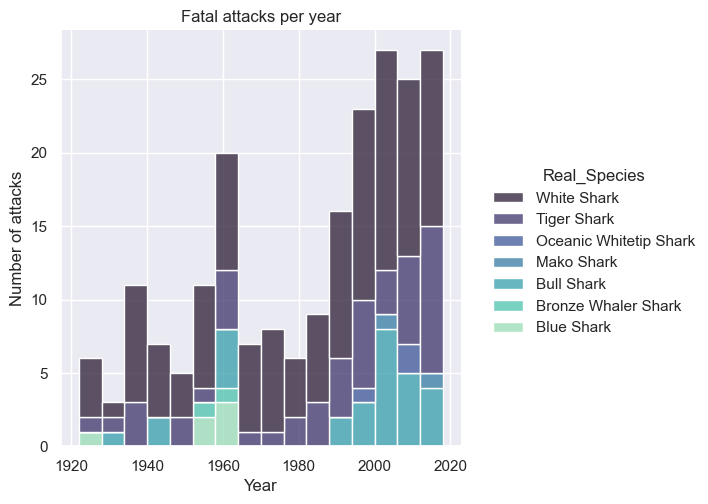

In [68]:
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.displot(species_fatal_df, x="Year_extracted", hue="Real_Species", multiple="stack", palette="mako", bins=16)
ax.set(xlabel='Year', ylabel='Number of attacks', title="Fatal attacks per year")
plt.savefig("./images/hst_fatal_attacks_year.png", bbox_inches='tight')

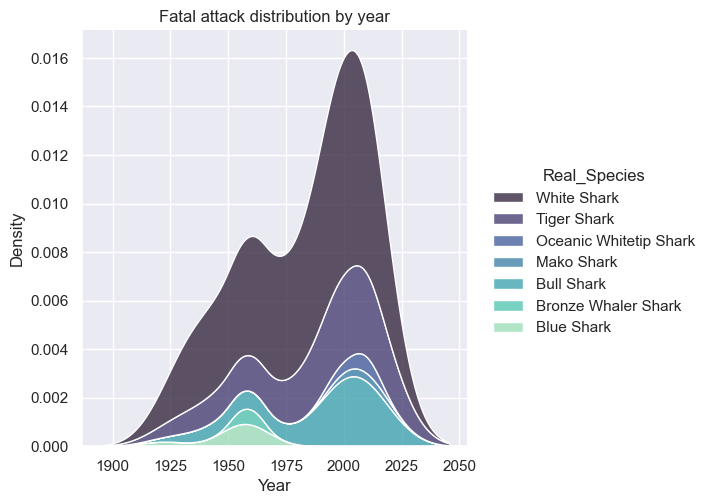

In [69]:
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.displot(species_fatal_df, x="Year_extracted", hue="Real_Species", kind="kde", multiple="stack", fill=True, palette="mako")
ax.set(xlabel='Year', ylabel='Density', title="Fatal attack distribution by year")
plt.savefig("./images/kde_fatal_attacks_year.png", bbox_inches='tight')

In [46]:
#sharks_df.to_csv("./Prueba.csv", index=False)